## Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

 Age: Positive Integer variable of the reviewers age.

 Title: String variable for the title of the review.

 Review Text: String variable for the review body.

 Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

 Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

 Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

 Division Name: Categorical name of the product high level division.

 Department Name: Categorical name of the product department name.

 Class Name: Categorical name of the product class name. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
women_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [10]:
women_df.shape

(23486, 11)

In [11]:
women_df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [12]:
women_df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [13]:
women_df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
women_df.duplicated('Title').sum()

9492

In [16]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    women_df = women_df[women_df[column].notnull()]
women_df.drop(women_df.columns[0], inplace=True, axis=1)

In [18]:
women_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [20]:
women_df['Label'] = 0

In [22]:
women_df.loc[women_df.Rating >= 3, ['Label']] = 1

In [23]:
women_df['Review Text word count'] = women_df['Review Text'].str.split().apply(len)

In [24]:
women_df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Review Text word count
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,8
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,62
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1,98
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,22
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,1,28
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,1,38
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,1,42
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,1,86


In [26]:
women_df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Review Text word count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [36]:
women_df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Label                       int64
Review Text word count      int64
dtype: object

In [27]:
women_df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


In [49]:
top_name_of_products = women_df['Class Name'].value_counts().head(20).index.tolist()

In [50]:
top_name_of_products

['Dresses',
 'Knits',
 'Blouses',
 'Sweaters',
 'Pants',
 'Jeans',
 'Fine gauge',
 'Skirts',
 'Jackets',
 'Lounge',
 'Swim',
 'Outerwear',
 'Shorts',
 'Sleep',
 'Legwear',
 'Intimates',
 'Layering',
 'Trend',
 'Casual bottoms',
 'Chemises']

## Exploratory Data Analysis

Text(0.5, 1.0, 'Age Distribution ')

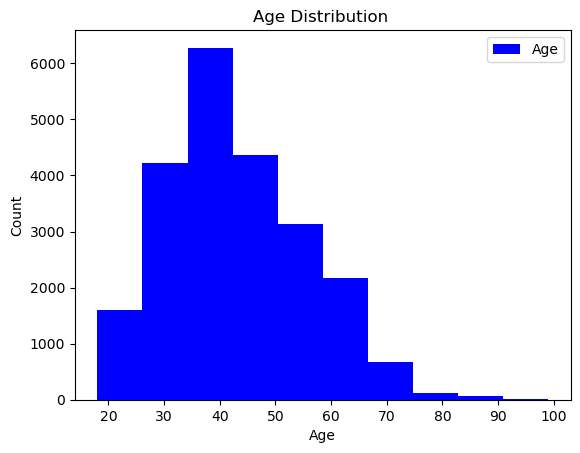

In [31]:
plt.hist(women_df['Age'], color="blue", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution ")

In [40]:
num_cols = women_df.dtypes[women_df.dtypes != "O"].index.tolist()

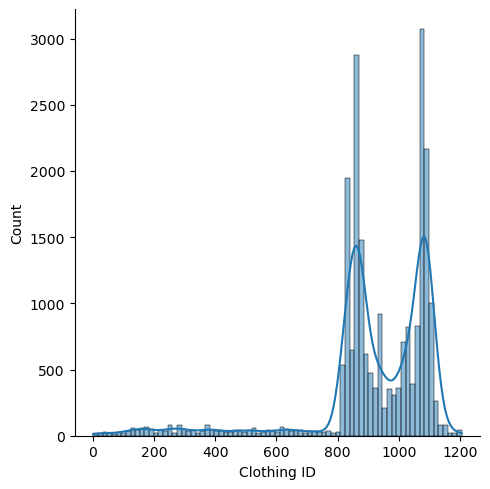

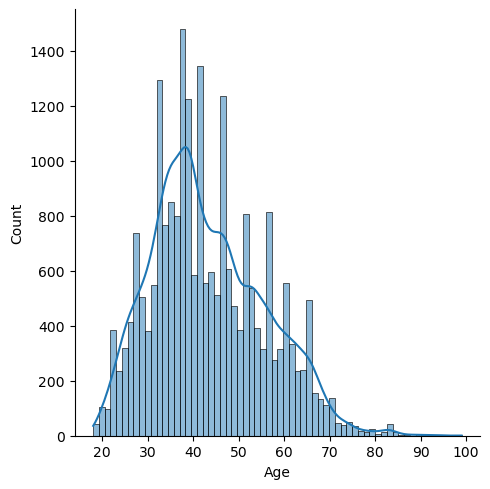

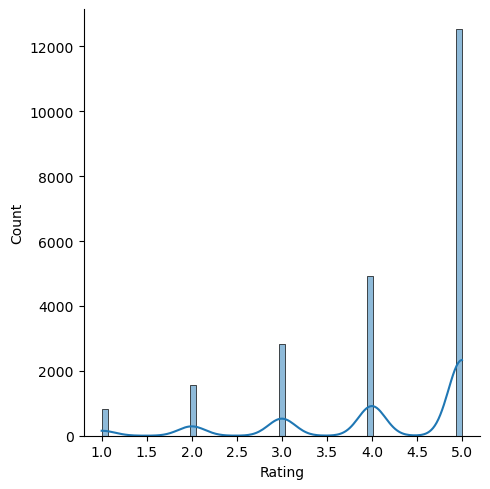

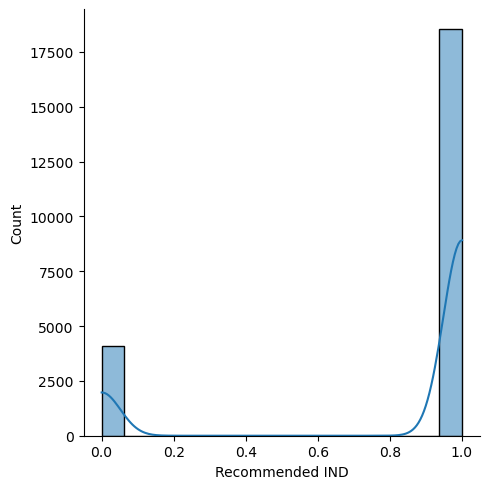

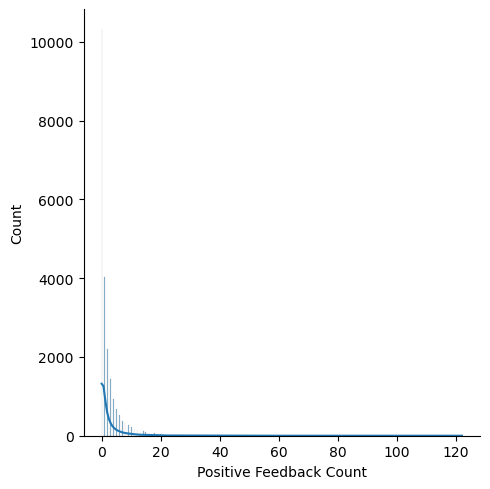

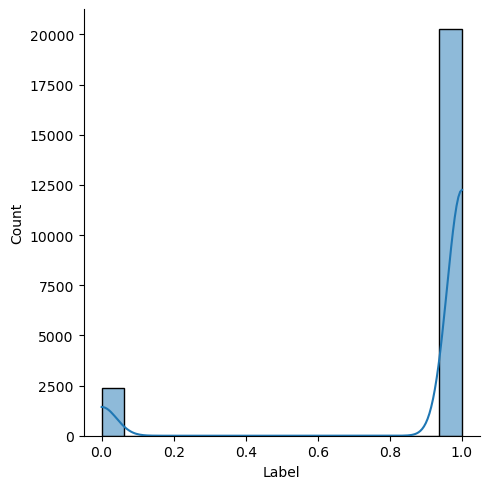

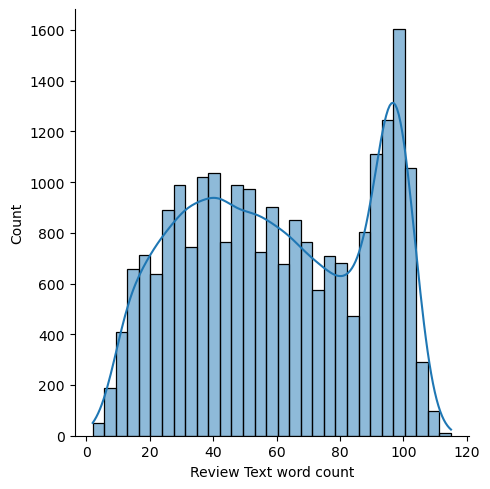

In [42]:
for num_col in num_cols:
  sns.displot(women_df[num_col], kde=True)
  plt.show()

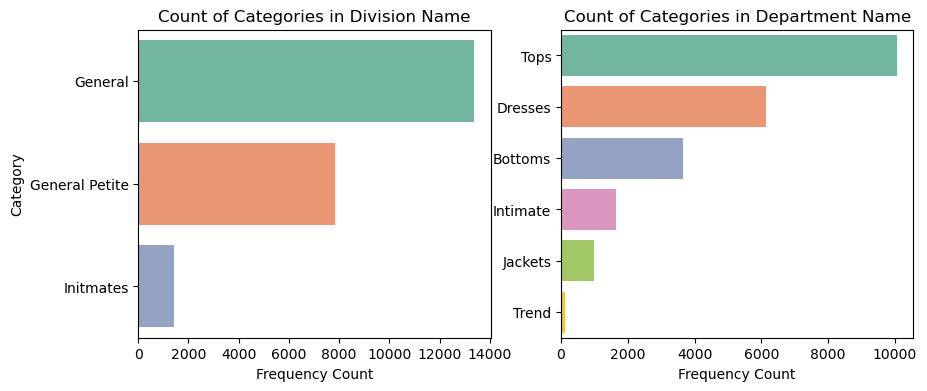

In [53]:
Divdep = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(Divdep), figsize=(10, 4), sharex=False)

for i, x in enumerate(Divdep):
    sns.countplot(y=x, data=women_df, order=women_df[x].value_counts().index, ax=axes[i], color="turquoise", palette="Set2")
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

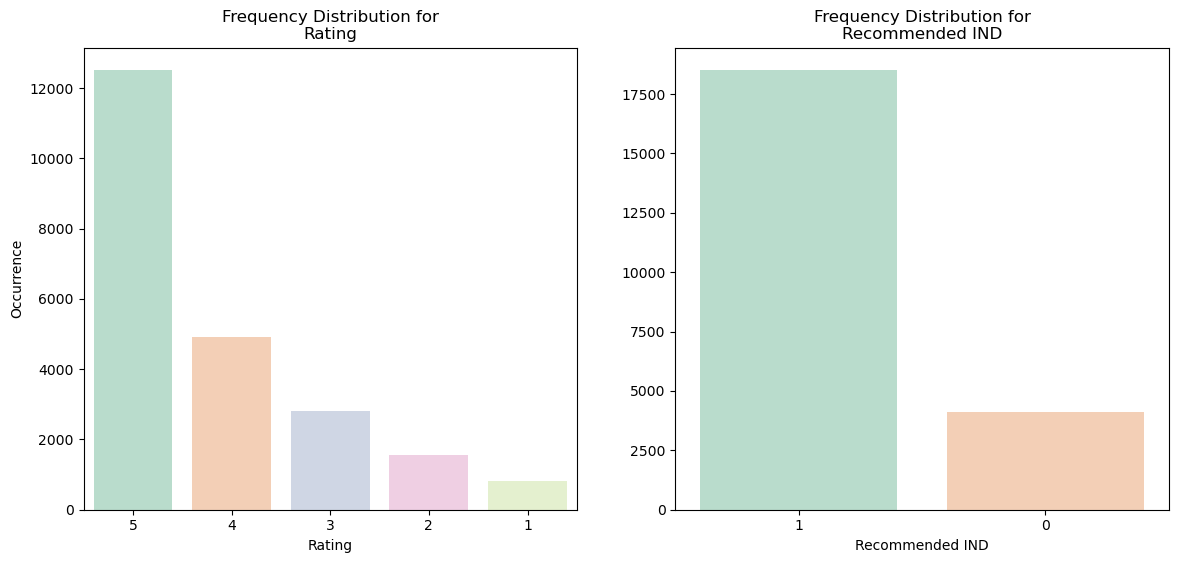

In [57]:
Categorical_dtypes = ['Rating', 'Recommended IND']
increment = 0
f, axes = plt.subplots(1, len(Categorical_dtypes), figsize=(14, 6), sharex=False)

for i in range(len(Categorical_dtypes)):
    sns.countplot(x=Categorical_dtypes[increment], data=women_df, order=women_df[Categorical_dtypes[increment]].value_counts().index, ax=axes[i], color="turquoise", palette="Pastel2")
    axes[i].set_title('Frequency Distribution for\n{}'.format(Categorical_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(Categorical_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
plt.savefig('freqdist-rating-recommended.png', format='png', dpi=300)
plt.show()